# ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 5



### Студент:  Фаик Карим
### Группа:   НФИбд-02-21

### Вариант №7
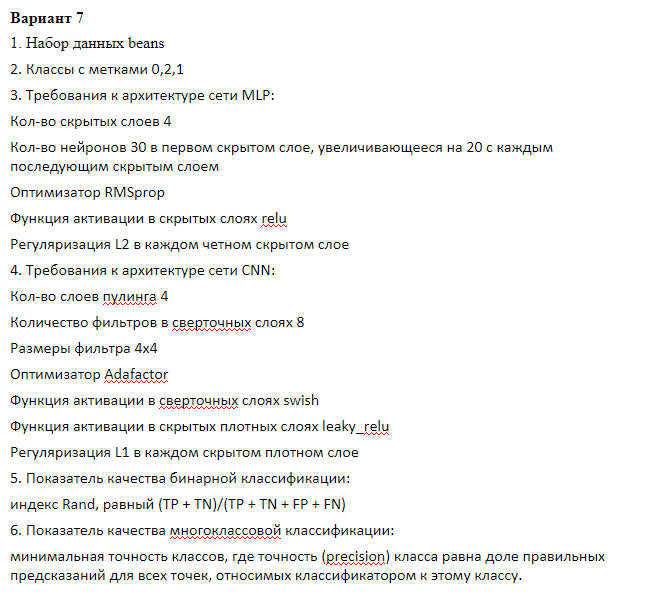

# 1.Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.

In [1]:
!pip install -q tfds-nightly
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
ds = tfds.load("beans", split=['train','validation'])


In [3]:
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape


((1034, 2), (133, 2))

In [4]:
df_train.head()

image  label
0  [[[149, 132, 106], [141, 124, 98], [134, 118, ...      1
1  [[[97, 88, 57], [97, 86, 56], [105, 91, 64], [...      1
2  [[[60, 146, 85], [61, 147, 86], [71, 153, 91],...      0
3  [[[113, 87, 70], [112, 86, 69], [110, 84, 69],...      0
4  [[[13, 15, 14], [15, 17, 16], [13, 15, 14], [6...      1

In [5]:
df_train.iloc[0]['image'].shape[0], df_test.iloc[0]['image'].shape

(500, (500, 500, 3))

In [6]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((1034,), (133,))

In [7]:
max_w1 = 0
max_w2 = 0
for i in range(df_train.shape[0]):
    if(df_train.iloc[i]['image'].shape[1] > max_w1):
        max_w1 = df_train.iloc[i]['image'].shape[1]

for i in range(df_test.shape[0]):
    if(df_test.iloc[i]['image'].shape[1] > max_w2):
        max_w2 = df_test.iloc[i]['image'].shape[1]

max_w1,max_w2

(500, 500)

размеры изменены из-за нехватки озу

In [8]:
train_images = np.zeros(shape=(df_train.shape[0],160,198,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],160,198,3), dtype=np.float32)
train_images.shape, test_images.shape

((1034, 160, 198, 3), (133, 160, 198, 3))

In [9]:
from PIL import Image, ImageOps

In [10]:
for idx in range(train_labels.shape[0]):

    train_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_train.iloc[idx]['image']), [160, 198]))


for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_test.iloc[idx]['image']), [160, 198]))

train_images.shape, test_images.shape

((1034, 160, 198, 3), (133, 160, 198, 3))

In [11]:
test_images[0]

array([[[149.63824 , 139.96275 ,  46.225063],
        [148.3646  , 121.768936,  87.958336],
        [129.71718 , 104.94287 ,  59.56313 ],
        ...,
        [174.63197 , 146.03217 , 135.94264 ],
        [168.92795 , 136.52168 , 132.00748 ],
        [132.12341 ,  97.123405,  92.998405]],

       [[161.25853 , 163.2399  ,  48.408775],
        [152.07576 , 132.6411  ,  90.02935 ],
        [116.86616 ,  94.05366 ,  52.76799 ],
        ...,
        [175.83978 , 147.21356 , 129.40045 ],
        [188.15346 , 156.75949 , 146.18661 ],
        [172.39534 , 139.39534 , 131.63457 ]],

       [[171.58932 , 188.12689 ,  59.8166  ],
        [135.13351 , 126.03125 ,  81.06629 ],
        [147.42361 , 128.73769 , 103.12184 ],
        ...,
        [164.46417 , 135.65106 , 122.02484 ],
        [169.62971 , 140.74051 , 130.03218 ],
        [150.14168 , 120.76667 , 110.45417 ]],

       ...,

       [[151.95013 ,  84.32513 ,  76.63763 ],
        [152.4214  ,  83.84564 ,  74.55777 ],
        [158.68466 ,  

In [12]:
train_images /= 255
test_images  /= 255

# 2.Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

In [13]:
import random

def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)

    num_row = 2
    num_col = 5

    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    # For every image
    for i in range(num_row * num_col):
        # Read the image
        img = imgs[i]
        # Display the image
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)

    plt.tight_layout()
    plt.show()

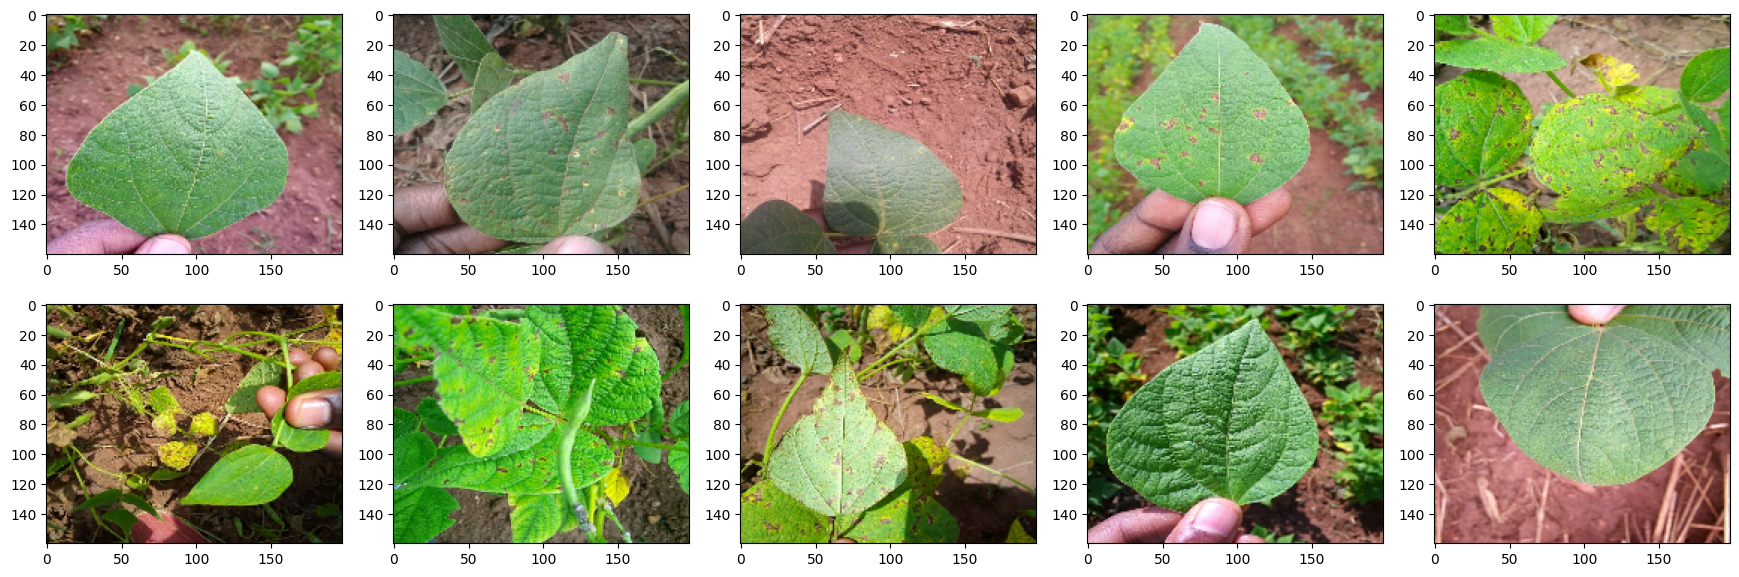

In [14]:
plot_random_sample(train_images)

# 3.Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании). Отследите обучение нейронных сетей и укажите, на сколько процентов снизились в результате обучения потери по отношению к потерям на первой эпохе обучения. Оцените результаты обучения нейронных сетей (варианты: нейронная сеть обучилась, недообучилась, переобучилась).

In [15]:
train_imagesb = []
train_labelsb = []

for i in range(train_labels.shape[0]):
  if(df_train.iloc[i]['label'] in (0,2)):
    train_imagesb.append(train_images[i])
    train_labelsb.append(train_labels[i])

train_imagesb = np.asarray(train_imagesb)
train_labelsb = np.asarray(train_labelsb)

train_imagesb.shape, train_labelsb.shape

((686, 160, 198, 3), (686,))

In [16]:
test_imagesb = []
test_labelsb = []

for i in range(test_labels.shape[0]):
  if(df_test.iloc[i]['label'] in (0,2)):
    test_imagesb.append(test_images[i])
    test_labelsb.append(test_labels[i])

test_imagesb = np.asarray(test_imagesb)
test_labelsb = np.asarray(test_labelsb)

test_imagesb.shape, test_labelsb.shape

((88, 160, 198, 3), (88,))

In [17]:
train_labelsb

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 0., 2., 2., 2., 2., 0.,
       2., 0., 0., 0., 0., 2., 0., 2., 0., 0., 2., 2., 2., 2., 2., 0., 0.,
       2., 2., 0., 2., 2., 0., 2., 0., 0., 2., 0., 2., 2., 0., 2., 2., 2.,
       0., 2., 2., 2., 0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0.,
       0., 2., 0., 0., 0., 2., 2., 2., 2., 0., 2., 0., 0., 2., 2., 0., 0.,
       2., 2., 0., 2., 0., 2., 0., 2., 0., 2., 2., 2., 2., 0., 0., 0., 2.,
       2., 0., 0., 2., 2., 0., 0., 2., 2., 0., 0., 2., 2., 0., 0., 2., 2.,
       2., 2., 0., 0., 2., 0., 2., 2., 0., 0., 0., 2., 2., 2., 2., 0., 0.,
       0., 2., 0., 0., 2., 0., 0., 0., 2., 2., 0., 0., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 2., 2., 0., 0., 0., 2., 0., 0., 0., 2., 2., 2., 0., 2., 0., 0.,
       0., 0., 0., 2., 2., 2., 2., 2., 0., 2., 2., 0., 2., 2., 2., 2., 2.,
       0., 0., 0., 2., 2., 0., 0., 2., 0., 0., 0., 2., 0., 2., 0., 2., 2.,
       2., 0., 0., 0., 2.

In [18]:
for i in range(test_labelsb.shape[0]):
  if test_labelsb[i] == 0:
    test_labelsb[i] = 0
  if test_labelsb[i] == 2:
    test_labelsb[i] = 1

In [19]:
for i in range(train_labelsb.shape[0]):
  if train_labelsb[i] == 0:
    train_labelsb[i] = 0
  if train_labelsb[i] == 2:
    train_labelsb[i] = 1

In [20]:
del train_labels
del test_labels
del test_images
del train_images
del df_train
del df_test

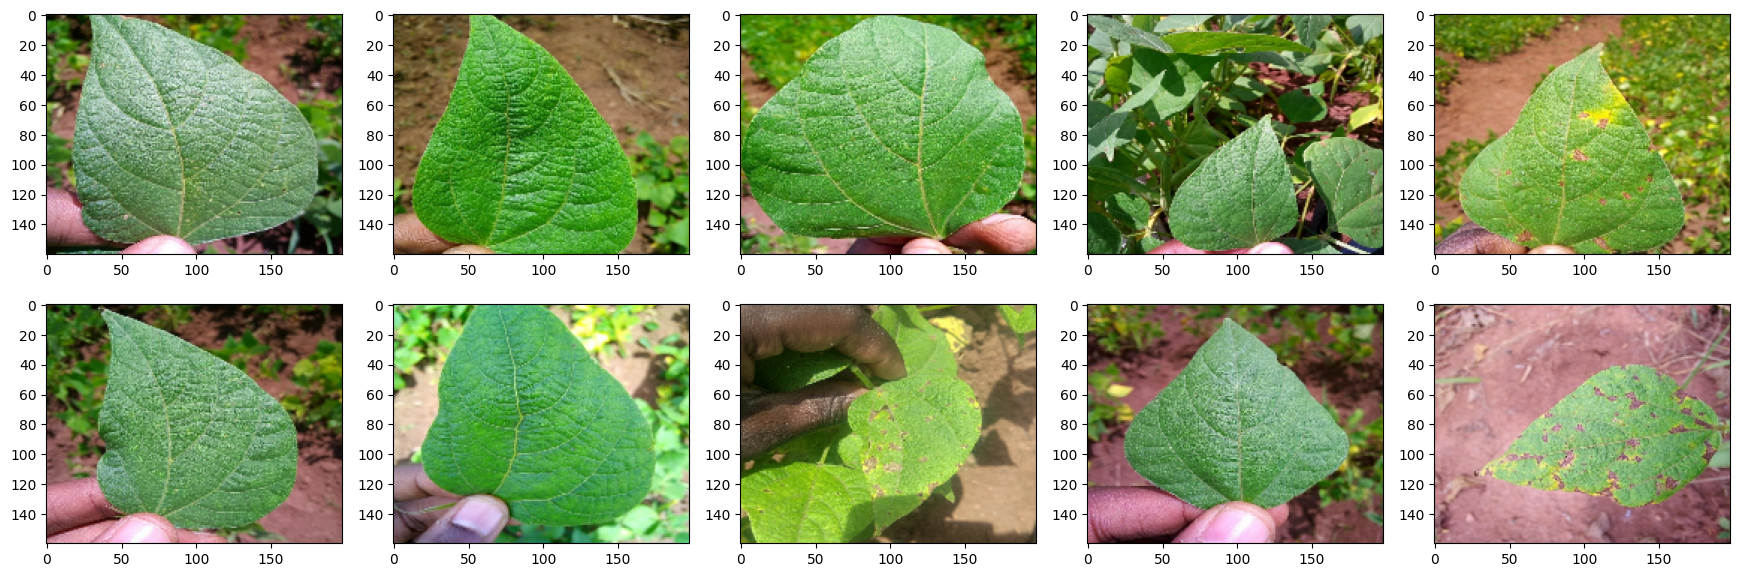

In [21]:
plot_random_sample(test_imagesb)

### MLP

In [22]:
feature_normalizer = tf.keras.layers.Normalization(axis=None)
feature_normalizer.adapt(train_imagesb)

In [23]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(160, 198, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(90, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_imagesb,
    train_labelsb,
    epochs=15,
    batch_size=64,
    validation_data=(test_imagesb, test_labelsb)
)

Epoch 1/15
11/11 [==============================] - 2s 128ms/step - loss: 7.6995 - accuracy: 0.5204 - val_loss: 4.4070 - val_accuracy: 0.5000
Epoch 2/15
11/11 [==============================] - 1s 118ms/step - loss: 3.5246 - accuracy: 0.4883 - val_loss: 1.8300 - val_accuracy: 0.5000
Epoch 3/15
11/11 [==============================] - 1s 122ms/step - loss: 1.6676 - accuracy: 0.4869 - val_loss: 1.5992 - val_accuracy: 0.5000
Epoch 4/15
11/11 [==============================] - 1s 81ms/step - loss: 1.5462 - accuracy: 0.5087 - val_loss: 1.5208 - val_accuracy: 0.5000
Epoch 5/15
11/11 [==============================] - 1s 71ms/step - loss: 1.4934 - accuracy: 0.4971 - val_loss: 1.4717 - val_accuracy: 0.5000
Epoch 6/15
11/11 [==============================] - 1s 80ms/step - loss: 1.4510 - accuracy: 0.5029 - val_loss: 1.4249 - val_accuracy: 0.5000
Epoch 7/15
11/11 [==============================] - 1s 79ms/step - loss: 1.4044 - accuracy: 0.5029 - val_loss: 1.3779 - val_accuracy: 0.5000
Epoch 8/15

###CNN

In [24]:
tf.random.set_seed(42)

model_2 =  tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4),input_shape=(160, 198, 3), activation='swish'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4),activation='swish'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4),activation='swish'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4),activation='swish'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L1(l1=0.01)),
    tf.keras.layers.Dense(128, activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L1(l1=0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adafactor(learning_rate=0.5),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_2 = model_2.fit(
    train_imagesb,
    train_labelsb,
    epochs=15,
    batch_size=64,
    validation_data=(test_imagesb, test_labelsb)
)

Epoch 1/15
11/11 [==============================] - 20s 2s/step - loss: 41.3401 - accuracy: 0.5117 - val_loss: 7.9031 - val_accuracy: 0.5000
Epoch 2/15
11/11 [==============================] - 16s 2s/step - loss: 6.9586 - accuracy: 0.5641 - val_loss: 6.0691 - val_accuracy: 0.6136
Epoch 3/15
11/11 [==============================] - 16s 1s/step - loss: 5.6370 - accuracy: 0.5831 - val_loss: 5.1632 - val_accuracy: 0.6136
Epoch 4/15
11/11 [==============================] - 16s 1s/step - loss: 4.8634 - accuracy: 0.6429 - val_loss: 4.5384 - val_accuracy: 0.6705
Epoch 5/15
11/11 [==============================] - 17s 2s/step - loss: 4.3756 - accuracy: 0.6020 - val_loss: 4.1192 - val_accuracy: 0.6705
Epoch 6/15
11/11 [==============================] - 17s 2s/step - loss: 3.9666 - accuracy: 0.6574 - val_loss: 3.8932 - val_accuracy: 0.5000
Epoch 7/15
11/11 [==============================] - 17s 2s/step - loss: 3.7050 - accuracy: 0.6327 - val_loss: 3.5809 - val_accuracy: 0.5114
Epoch 8/15
11/11 [=

In [25]:
start_loss1 = history_1.history['val_loss'][0]
start_loss1

4.406961917877197

In [26]:
end_loss1 = history_1.history['val_loss'][len(history_1.history['val_loss'])-1]
end_loss1

0.9332146048545837

In [27]:
start_loss2 = history_2.history['val_loss'][0]
start_loss2

7.903099536895752

In [28]:
end_loss2 = history_2.history['val_loss'][len(history_2.history['val_loss'])-1]
end_loss2

2.248276472091675

Рассчитаем разницу процентов потерь на первой эпохе и второй эпохе

In [29]:
difference1 = abs((end_loss1 - start_loss1)/start_loss1)*100
difference1

78.82408284335466

In [30]:
difference2 = abs((end_loss2 - start_loss2)/start_loss2)*100
difference2

71.55196563581721

# 4.Постройте кривые обучения нейронных сетей бинарной классификации для показателей потерь и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

In [31]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

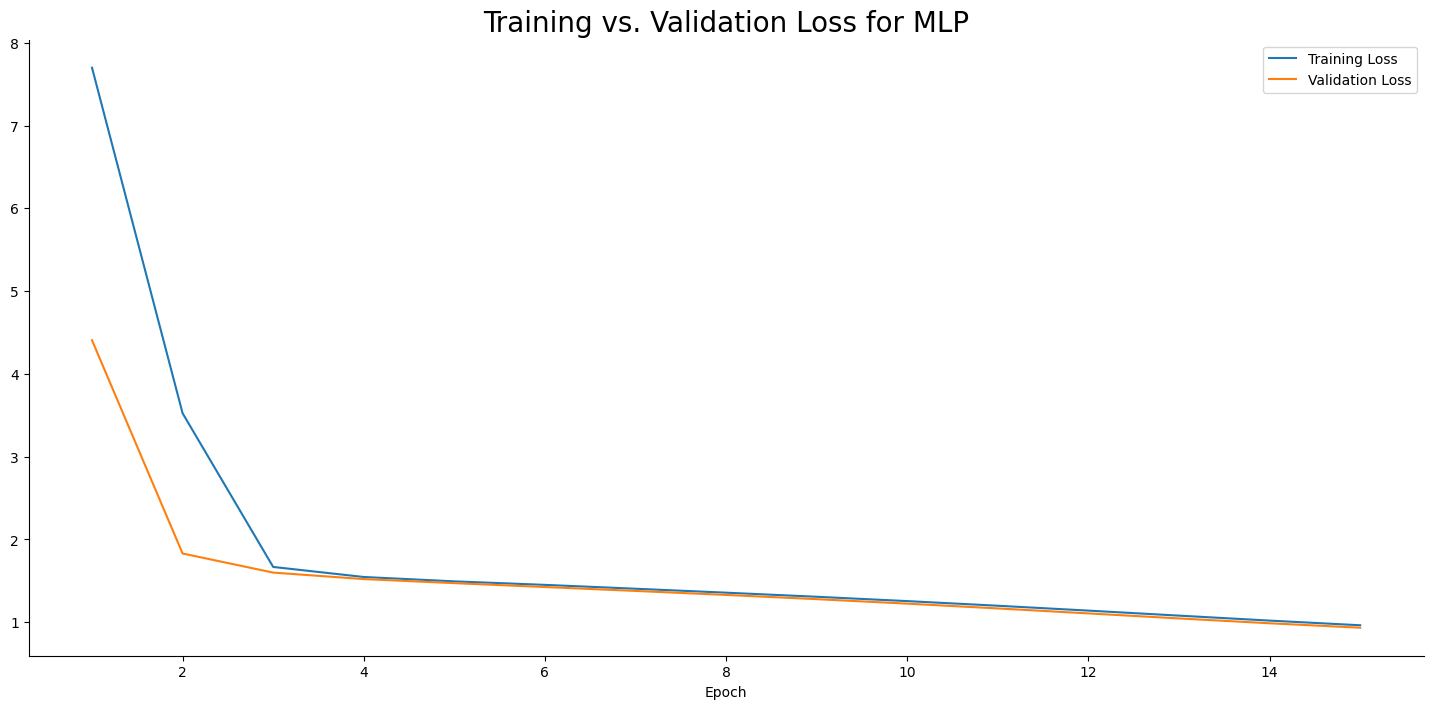

In [32]:
plt.plot(np.arange(1, 16), history_1.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 16), history_1.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss for MLP', size=20)
plt.xlabel('Epoch', size=10)
plt.legend();

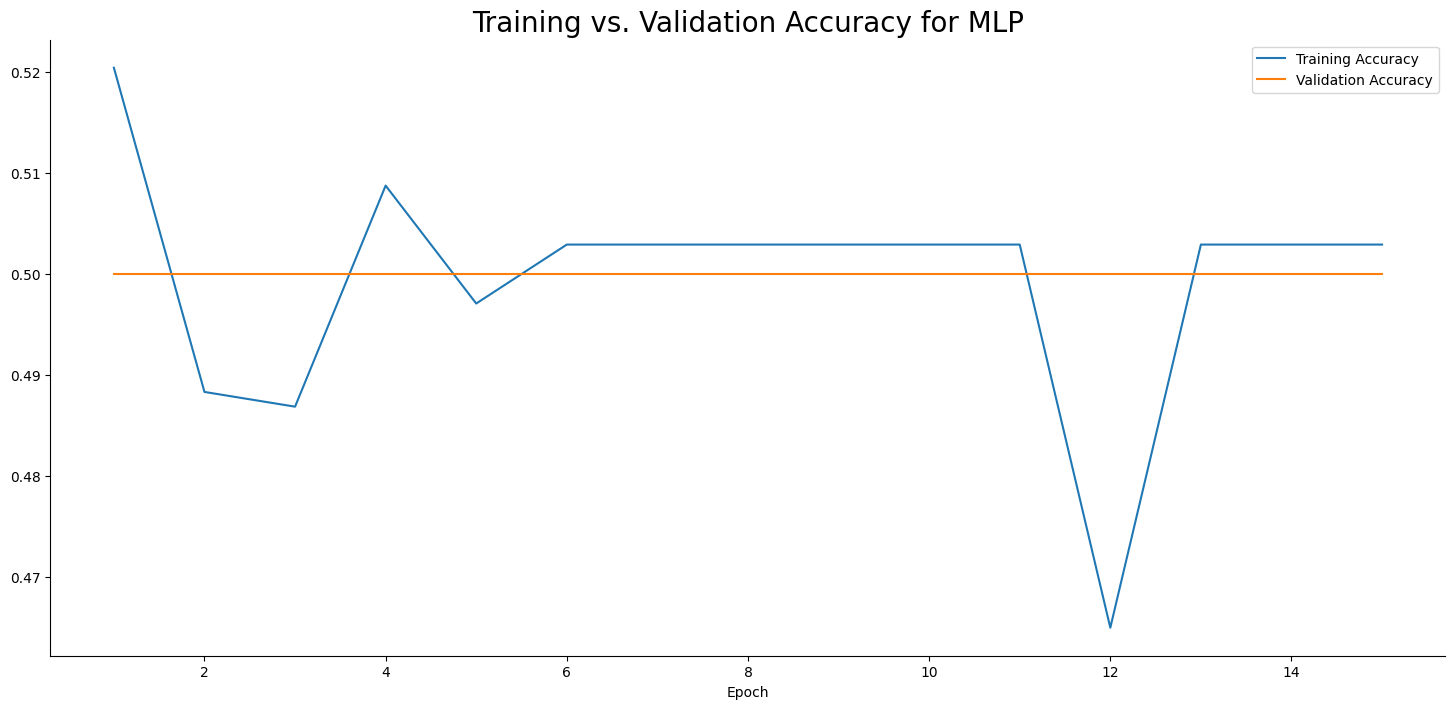

In [33]:
plt.plot(np.arange(1, 16), history_1.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 16), history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy for MLP', size=20)
plt.xlabel('Epoch', size=10)
plt.legend();

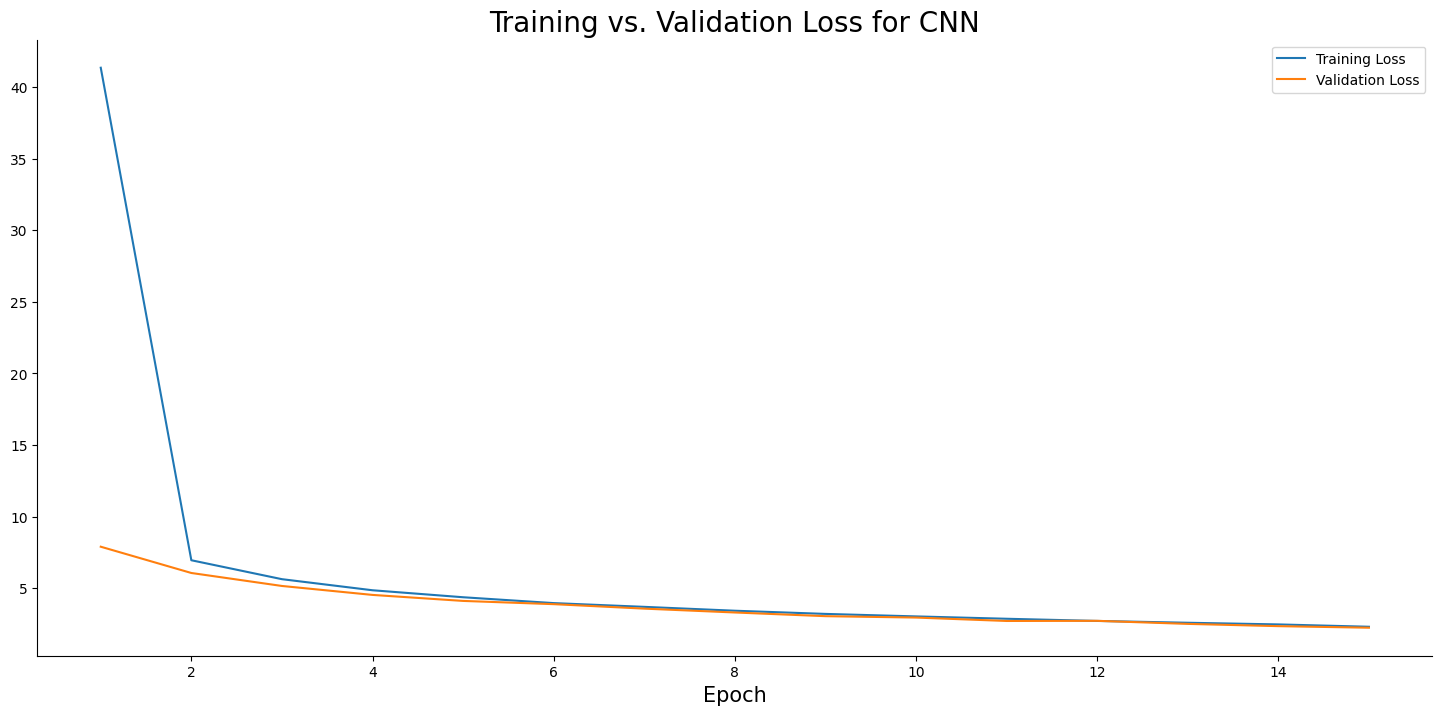

In [34]:
plt.plot(np.arange(1, 16), history_2.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 16), history_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss for CNN', size=20)
plt.xlabel('Epoch', size=15)
plt.legend();

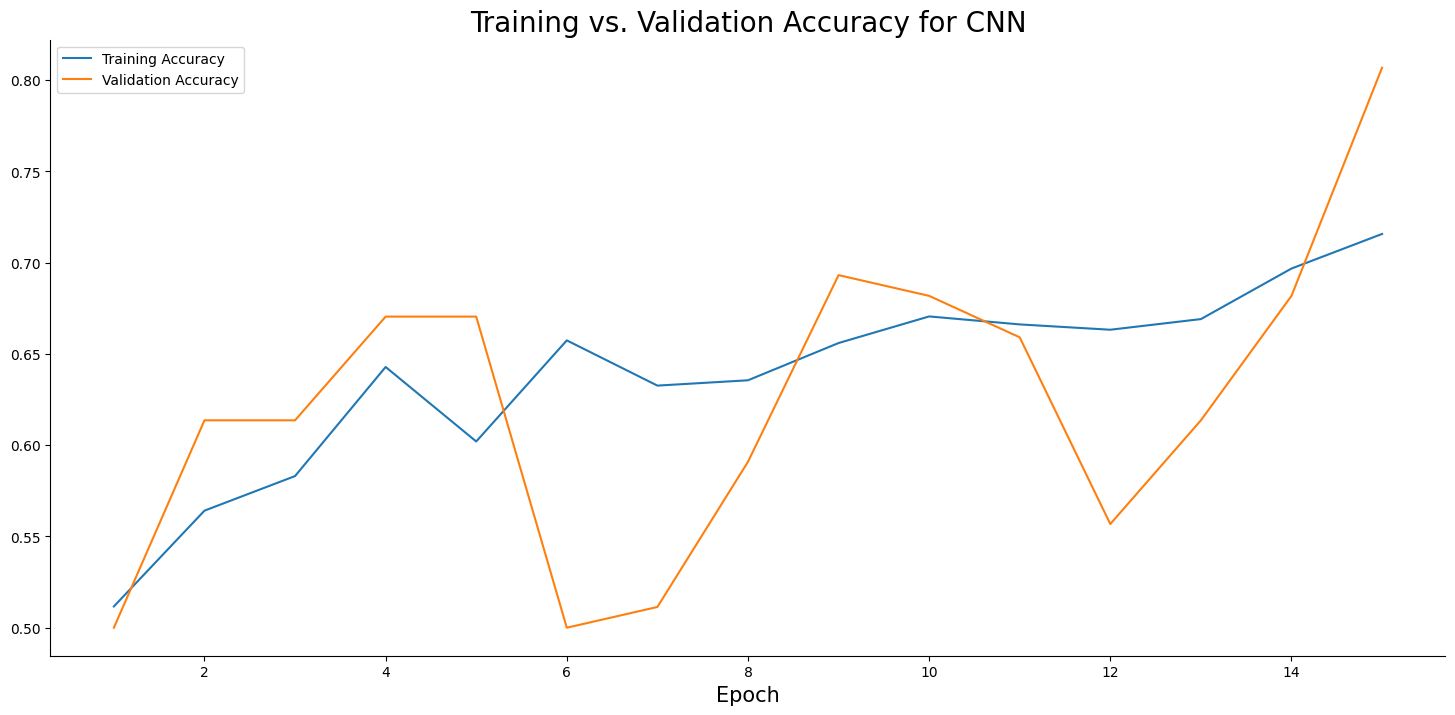

In [35]:
plt.plot(np.arange(1, 16), history_2.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 16), history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy for CNN', size=20)
plt.xlabel('Epoch', size=15)
plt.legend();

# 5. Сравните качество бинарной классификации нейронными сетями при помощи показателя качества, указанного в индивидуальном задании.

In [36]:
predictions_mlp = model_1.predict(test_imagesb)
predictions_mlp = (predictions_mlp > 0.5).astype(int)

predictions_cnn = model_2.predict(test_imagesb)
predictions_cnn = (predictions_cnn > 0.5).astype(int)

TP_mlp = np.sum(np.logical_and(predictions_mlp == 1, test_labelsb == 1))
TN_mlp = np.sum(np.logical_and(predictions_mlp == 0, test_labelsb == 0))
FP_mlp = np.sum(np.logical_and(predictions_mlp == 1, test_labelsb == 0))
FN_mlp = np.sum(np.logical_and(predictions_mlp == 0, test_labelsb == 1))

TP_cnn = np.sum(np.logical_and(predictions_cnn == 1, test_labelsb == 1))
TN_cnn = np.sum(np.logical_and(predictions_cnn == 0, test_labelsb == 0))
FP_cnn = np.sum(np.logical_and(predictions_cnn == 1, test_labelsb == 0))
FN_cnn = np.sum(np.logical_and(predictions_cnn == 0, test_labelsb == 1))

Rand_mlp = (TP_mlp + TN_mlp) / (TP_mlp + TN_mlp + FP_mlp + FN_mlp)
Rand_cnn = (TP_cnn + TN_cnn) / (TP_cnn + TN_cnn + FP_cnn + FN_cnn)

print("Индекс для MLP модели:", Rand_mlp)
print("Индекс для CNN модели:", Rand_cnn)

3/3 [==============================] - 1s 152ms/step
Индекс для MLP модели: 0.5
Индекс для CNN модели: 0.5


# 6. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.

In [37]:
predictions_mlp, test_labelsb

(array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],

In [38]:
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

In [39]:
def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):

        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])

    return roc.reshape(-1, 2)

3/3 [==============================] - 1s 249ms/step


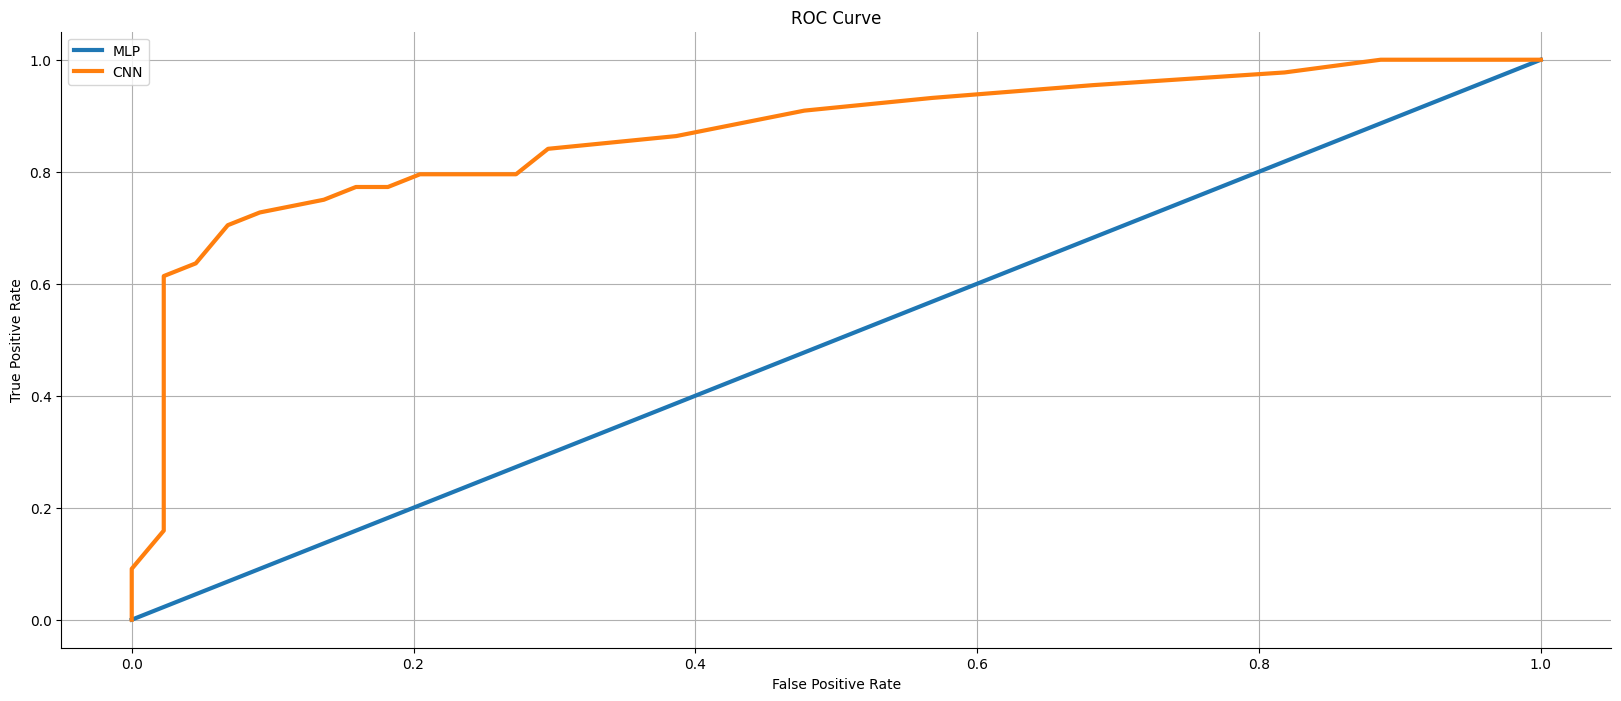

Площадь под ROC-кривой для MLP: 0.50
Площадь под ROC-кривой для CNN: 0.87


In [40]:
plt.figure(figsize=(20, 8))

predictions_mlp = model_1.predict(test_imagesb)
ROC_mlp = roc_from_scratch(predictions_mlp.reshape(-1), test_labelsb, partitions=50)
plt.plot(ROC_mlp[:,0], ROC_mlp[:,1], label='MLP', linewidth=3)

predictions_cnn = model_2.predict(test_imagesb)
ROC_cnn = roc_from_scratch(predictions_cnn.reshape(-1), test_labelsb, partitions=50)
plt.plot(ROC_cnn[:,0], ROC_cnn[:,1], label='CNN', linewidth=3)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

auc_score_mlp = np.trapz(sorted(ROC_mlp[:,1]), sorted(ROC_mlp[:,0]))
auc_score_cnn = np.trapz(sorted(ROC_cnn[:,1]), sorted(ROC_cnn[:,0]))

print(f'Площадь под ROC-кривой для MLP: {auc_score_mlp:.2f}')
print(f'Площадь под ROC-кривой для CNN: {auc_score_cnn:.2f}')

# 7.Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (требования к архитектуре сетей указаны в индивидуальном задании).

In [41]:
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

((1034, 2), (133, 2))

In [42]:
df_train = df_train[df_train['label'].isin([0, 2, 1])]
df_test = df_test[df_test['label'].isin([0, 2, 1])]
df_train.shape, df_test.shape

((1034, 2), (133, 2))

In [43]:
df_train['label'].unique(), df_test['label'].unique()

(array([1, 0, 2]), array([1, 2, 0]))

In [44]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((1034,), (133,))

In [45]:
train_images = np.zeros(shape=(df_train.shape[0],160,198,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],160,198,3), dtype=np.float32)
train_images.shape, test_images.shape

((1034, 160, 198, 3), (133, 160, 198, 3))

In [46]:
for idx in range(train_labels.shape[0]):

    train_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_train.iloc[idx]['image']), [160, 198]))


for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_test.iloc[idx]['image']), [160, 198]))

train_images.shape, test_images.shape

((1034, 160, 198, 3), (133, 160, 198, 3))

In [47]:
train_images /= 255
test_images  /= 255

train_images.shape, test_images.shape

((1034, 160, 198, 3), (133, 160, 198, 3))

In [48]:
train_labels

array([1., 1., 0., ..., 2., 1., 0.], dtype=float32)

In [49]:
del df_train
del df_test

In [50]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(160, 198, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(90, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2=0.01)),
    tf.keras.layers.Dense(1, activation='softmax')
])

model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_1 = model_1.fit(
    train_imagesb,
    train_labelsb,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 2s 101ms/step - loss: 1.0714 - accuracy: 0.4971 - val_loss: 1.0063 - val_accuracy: 0.3383
Epoch 2/10
11/11 [==============================] - 1s 77ms/step - loss: 0.9750 - accuracy: 0.4971 - val_loss: 0.9413 - val_accuracy: 0.3383
Epoch 3/10
11/11 [==============================] - 1s 77ms/step - loss: 0.9217 - accuracy: 0.4971 - val_loss: 0.9002 - val_accuracy: 0.3383
Epoch 4/10
11/11 [==============================] - 1s 62ms/step - loss: 0.8873 - accuracy: 0.4971 - val_loss: 0.8758 - val_accuracy: 0.3383
Epoch 5/10
11/11 [==============================] - 1s 78ms/step - loss: 0.8689 - accuracy: 0.4971 - val_loss: 0.8635 - val_accuracy: 0.3383
Epoch 6/10
11/11 [==============================] - 1s 78ms/step - loss: 0.8624 - accuracy: 0.4971 - val_loss: 0.8645 - val_accuracy: 0.3383
Epoch 7/10
11/11 [==============================] - 1s 95ms/step - loss: 0.8686 - accuracy: 0.4971 - val_loss: 0.8765 - val_accuracy: 0.3383
Epoch 8/10
11/11 [=====

In [53]:
tf.random.set_seed(42)

model_2 =  tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4),input_shape=(160, 198, 3), activation='swish'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4),activation='swish'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4),activation='swish'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(4, 4),activation='swish'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L1(l1=0.01)),
    tf.keras.layers.Dense(128, activation='leaky_relu',kernel_regularizer=tf.keras.regularizers.L1(l1=0.01)),
    tf.keras.layers.Dense(1, activation='softmax')
])

model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adafactor(learning_rate=0.005),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_2 = model_2.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
17/17 [==============================] - 43s 2s/step - loss: 22.8892 - accuracy: 0.3366 - val_loss: 21.6891 - val_accuracy: 0.3383
Epoch 2/10
17/17 [==============================] - 26s 1s/step - loss: 20.7951 - accuracy: 0.3366 - val_loss: 19.7329 - val_accuracy: 0.3383
Epoch 3/10
17/17 [==============================] - 26s 2s/step - loss: 18.9478 - accuracy: 0.3366 - val_loss: 18.0289 - val_accuracy: 0.3383
Epoch 4/10
17/17 [==============================] - 27s 2s/step - loss: 17.4416 - accuracy: 0.3366 - val_loss: 16.7806 - val_accuracy: 0.3383
Epoch 5/10
17/17 [==============================] - 27s 2s/step - loss: 16.3284 - accuracy: 0.3366 - val_loss: 15.8422 - val_accuracy: 0.3383
Epoch 6/10
17/17 [==============================] - 28s 2s/step - loss: 15.5254 - accuracy: 0.3366 - val_loss: 15.1738 - val_accuracy: 0.3383
Epoch 7/10
17/17 [==============================] - 24s 1s/step - loss: 14.9775 - accuracy: 0.3366 - val_loss: 14.7756 - val_accuracy: 0.3383
Epoch 

# 8.Сравните качество многоклассовой классификации нейронными сетями при помощи показателя качества, указанного в индивидуальном задании.

In [54]:
predictions_mlp = model_1.predict(test_images)
predictions_cnn = model_2.predict(test_images)

5/5 [==============================] - 3s 399ms/step


In [55]:
share_mlp = 0
share_cnn = 0

for i in range(predictions_mlp.shape[0]):
  if(predictions_mlp[i] == test_labels[i]):
    share_mlp = share_mlp + 1

for i in range(predictions_cnn.shape[0]):
  if(predictions_cnn[i] == test_labels[i]):
    share_cnn = share_cnn + 1

share_mlp, share_cnn

(2, 2)

In [56]:
predictions_mlp.shape[0]

133

In [57]:
share_mlp = share_mlp/(predictions_mlp.shape[0])
share_cnn = share_cnn/(predictions_cnn.shape[0])
print(f"Доля правильных ответов mlp = {share_mlp}")
print(f"Доля правильных ответов cnn = {share_cnn}")

Доля правильных ответов mlp = 0.015037593984962405
Доля правильных ответов cnn = 0.015037593984962405


# 9.Постройте кривые обучения нейронных сетей многоклассовой классификации для показателей ошибки и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

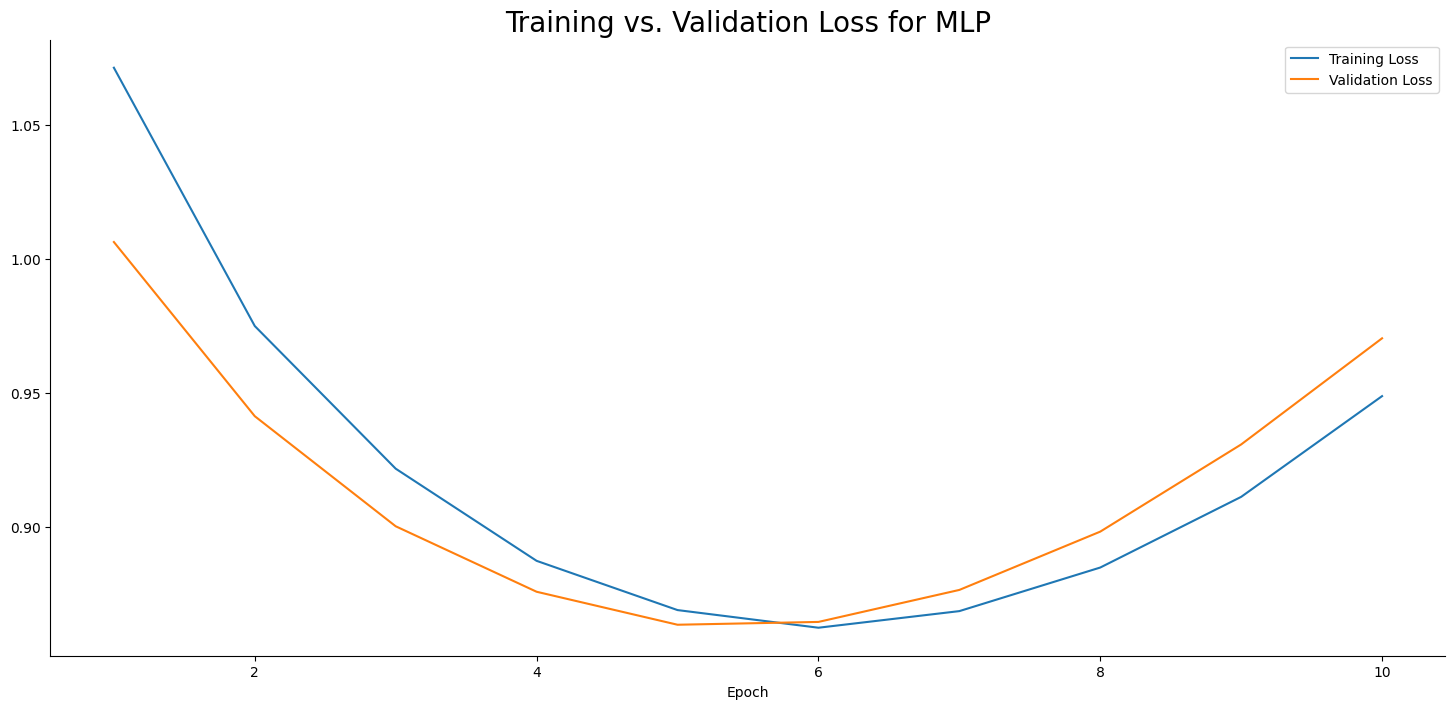

In [58]:
plt.plot(np.arange(1, 11), history_1.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 11), history_1.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss for MLP', size=20)
plt.xlabel('Epoch', size=10)
plt.legend();

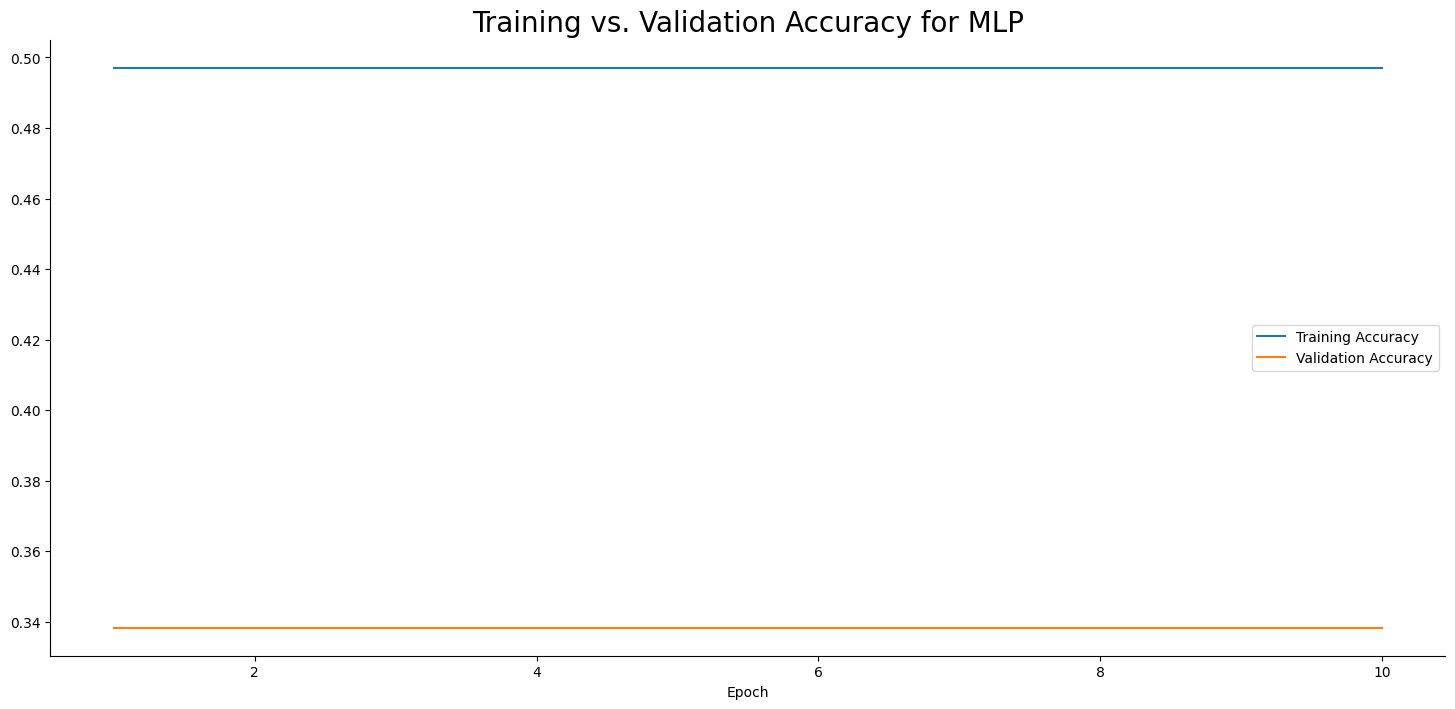

In [59]:
plt.plot(np.arange(1, 11), history_1.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 11), history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy for MLP', size=20)
plt.xlabel('Epoch', size=10)
plt.legend();

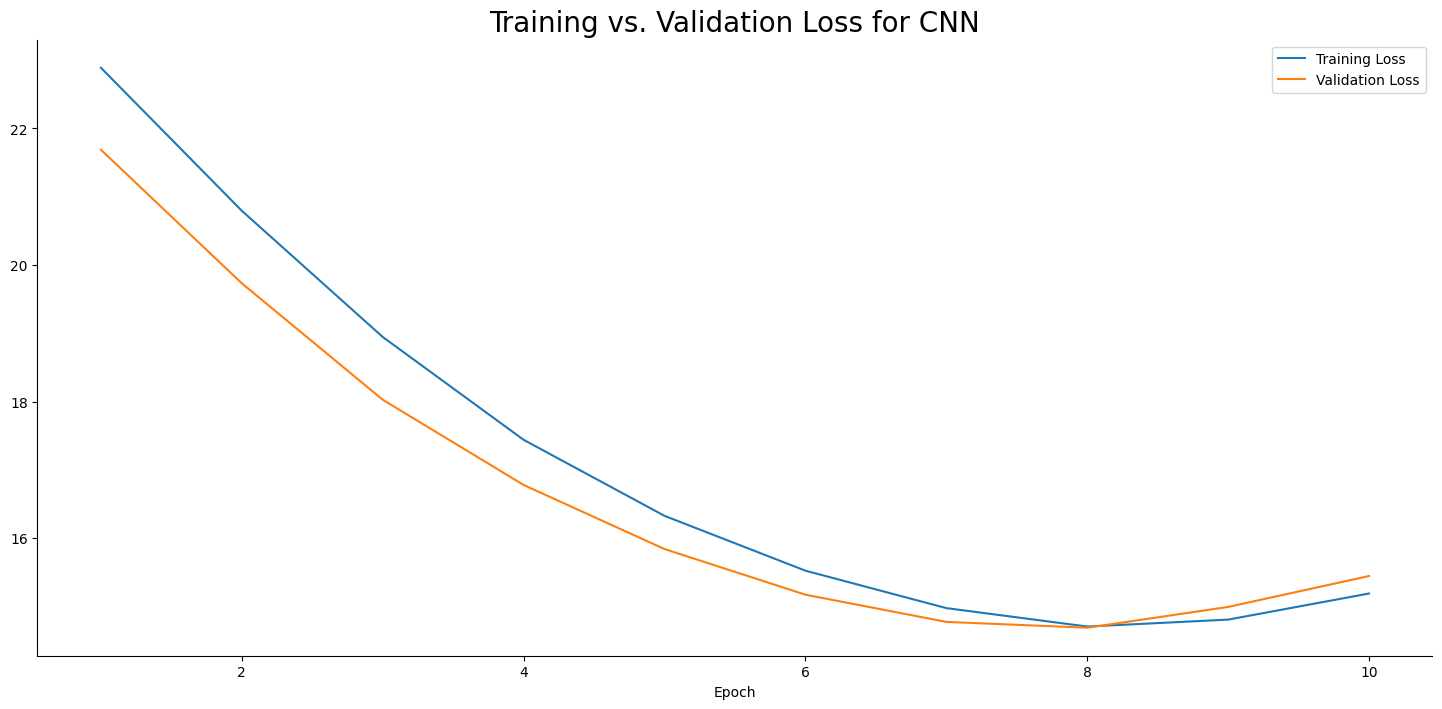

In [61]:
plt.plot(np.arange(1, 11), history_2.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 11), history_2.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss for CNN', size=20)
plt.xlabel('Epoch', size=10)
plt.legend();

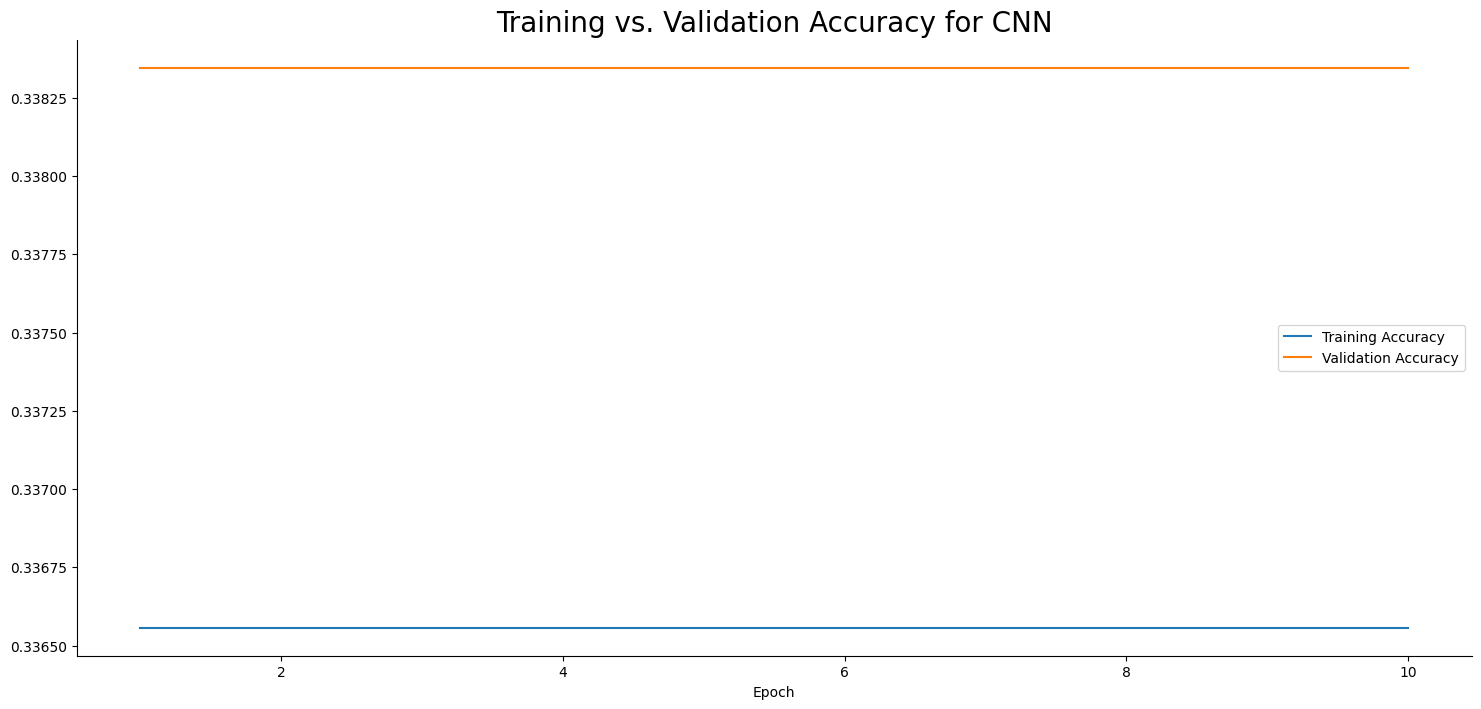

In [62]:
plt.plot(np.arange(1, 11), history_2.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, 11), history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy for CNN', size=20)
plt.xlabel('Epoch', size=10)
plt.legend();